1. Linearity Test:
Check the scatter plot of residuals vs fitted values. If residuals are randomly scattered, the linearity assumption is satisfied.
Conclusion: Look for randomness. A clear pattern (like curves) indicates non-linearity.

2. Independence Test (Durbin-Watson statistic): 2.0449619443636244
Conclusion: Residuals are independent (no autocorrelation).

3. Homoscedasticity Test (Breusch-Pagan p-value): 0.68498690312608
Conclusion: Residuals have constant variance (Homoscedasticity).

4. Normality Test (Shapiro-Wilk p-value): 0.7435964345932007
Conclusion: Residuals are normally distributed.



5. Multicollinearity Test (VIF):
        VIF Feature
0  7.695224   const
1  1.004693      X1
2  1.004693      X2
Conclusion: Moderate multicollinearity detected.

Final Conclusion:
Some assumptions are violated. Consider transforming variables, removing multicollinearity, or using different modeling techniques.



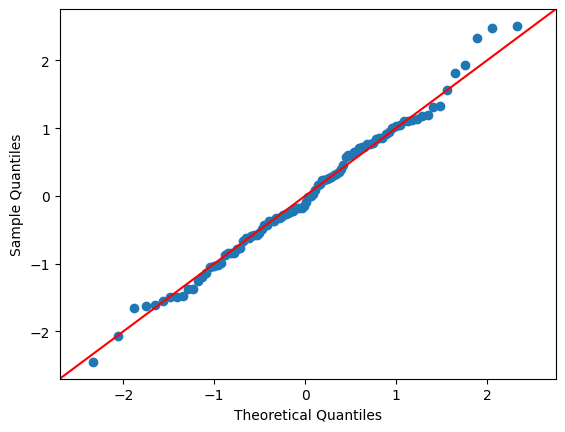

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan

# Generate example data (replace with your own data)
np.random.seed(0)
X = np.random.rand(100, 2)  # Two independent variables
y = 3 + 2 * X[:, 0] + 4 * X[:, 1] + np.random.randn(100)

# Add constant to independent variables
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# 1. Linearity test (Residuals plot using Plotly)
fig1 = px.scatter(x=model.fittedvalues, y=model.resid, labels={'x': 'Fitted values', 'y': 'Residuals'}, title='Residuals vs Fitted Values (Linearity Test)')
fig1.add_shape(type='line', x0=min(model.fittedvalues), y0=0, x1=max(model.fittedvalues), y1=0, line=dict(color='red', dash='dash'))
fig1.show()

# Interpretation: If residuals are randomly scattered, linearity assumption is met
print("1. Linearity Test:")
print("Check the scatter plot of residuals vs fitted values. If residuals are randomly scattered, the linearity assumption is satisfied.")
print("Conclusion: Look for randomness. A clear pattern (like curves) indicates non-linearity.\n")

# 2. Independence Test (Durbin-Watson test)
dw_stat = durbin_watson(model.resid)
print(f"2. Independence Test (Durbin-Watson statistic): {dw_stat}")
if 1.5 < dw_stat < 2.5:
    print("Conclusion: Residuals are independent (no autocorrelation).\n")
else:
    print("Conclusion: Residuals are not independent (possible autocorrelation).\n")

# 3. Homoscedasticity test (Breusch-Pagan test)
_, pval, __, f_pval = het_breuschpagan(model.resid, model.model.exog)
print(f"3. Homoscedasticity Test (Breusch-Pagan p-value): {pval}")
if pval > 0.05:
    print("Conclusion: Residuals have constant variance (Homoscedasticity).\n")
else:
    print("Conclusion: Residuals do not have constant variance (Heteroscedasticity detected).\n")

# 4. Normality test of residuals (Shapiro-Wilk test and Q-Q plot using Plotly)
shapiro_test = stats.shapiro(model.resid)
print(f"4. Normality Test (Shapiro-Wilk p-value): {shapiro_test.pvalue}")
if shapiro_test.pvalue > 0.05:
    print("Conclusion: Residuals are normally distributed.\n")
else:
    print("Conclusion: Residuals deviate from normality.\n")

qq_fig = sm.qqplot(model.resid, line='45', fit=True)
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=qq_fig.gca().lines[1].get_xdata(), y=qq_fig.gca().lines[1].get_ydata(), mode='markers', name='Residuals'))
fig2.add_trace(go.Scatter(x=qq_fig.gca().lines[0].get_xdata(), y=qq_fig.gca().lines[0].get_ydata(), mode='lines', name='45-degree line'))
fig2.update_layout(title='Q-Q Plot (Normality Test)', xaxis_title='Theoretical Quantiles', yaxis_title='Sample Quantiles')
fig2.show()

# 5. Multicollinearity test (VIF)
vif_data = pd.DataFrame()
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif_data["Feature"] = ["const", "X1", "X2"]  # Add your own feature names here
print("5. Multicollinearity Test (VIF):")
print(vif_data)

# Interpretation: VIF < 5 means no multicollinearity
if all(vif_data["VIF"] < 5):
    print("Conclusion: No multicollinearity detected.\n")
elif any(vif_data["VIF"] > 10):
    print("Conclusion: High multicollinearity detected.\n")
else:
    print("Conclusion: Moderate multicollinearity detected.\n")

# Final Conclusion
print("Final Conclusion:")
if (1.5 < dw_stat < 2.5) and pval > 0.05 and shapiro_test.pvalue > 0.05 and all(vif_data["VIF"] < 5):
    print("All assumptions are satisfied. The linear regression model is valid.\n")
else:
    print("Some assumptions are violated. Consider transforming variables, removing multicollinearity, or using different modeling techniques.\n")